In [1]:
import pandas as pd # Data frame
import seaborn as sns # Analysis/ Visualization
from matplotlib import pyplot as plt #Ploting
import numpy as np #Linear Algebra Calculation
from sklearn.model_selection import train_test_split as tts # Data Spliting
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve

In [2]:
import warnings as w
w.filterwarnings('ignore')

In [3]:
df=pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

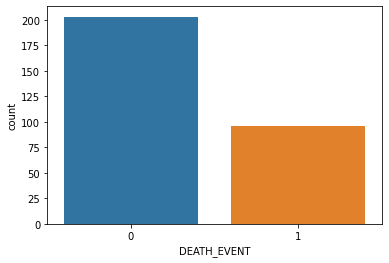

In [6]:
sns.countplot(df.DEATH_EVENT)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

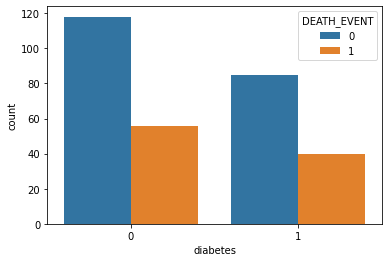

In [7]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df) #diabetes ar sathe deathevent kirokom related 
##diabetes hobe jodi 1 hoi hobe na 0 hole

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

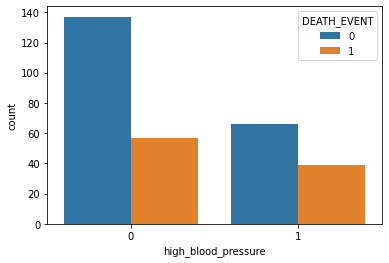

In [8]:
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT',data=df)##high_blood_pressure hobe jodi 1 hoi hobe na 0 hole

<AxesSubplot:xlabel='anaemia', ylabel='count'>

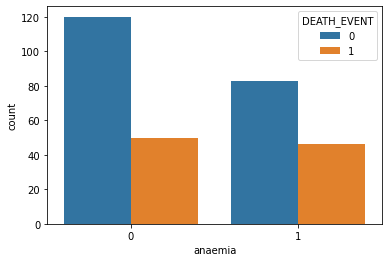

In [9]:
sns.countplot(x='anaemia',hue='DEATH_EVENT',data=df) ## anamia hobe jodi 1 hoi hobe na 0 hole

In [10]:
df.corr()# proti ti feature ar corelation

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:title={'center':'Correlation For Every Column'}>

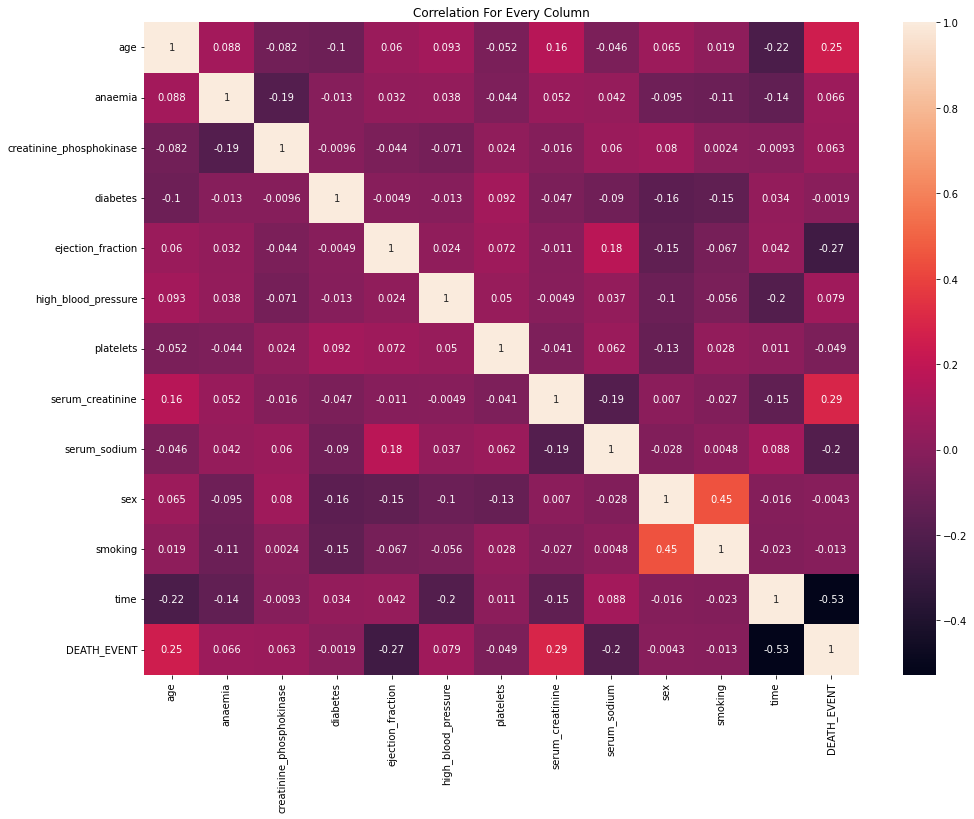

In [11]:
plt.figure(figsize=(16,12))
plt.title('Correlation For Every Column')
sns.heatmap(df.corr(),annot=True) # correlation matplotlib a dekhte hole

# Visualizing dataset

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

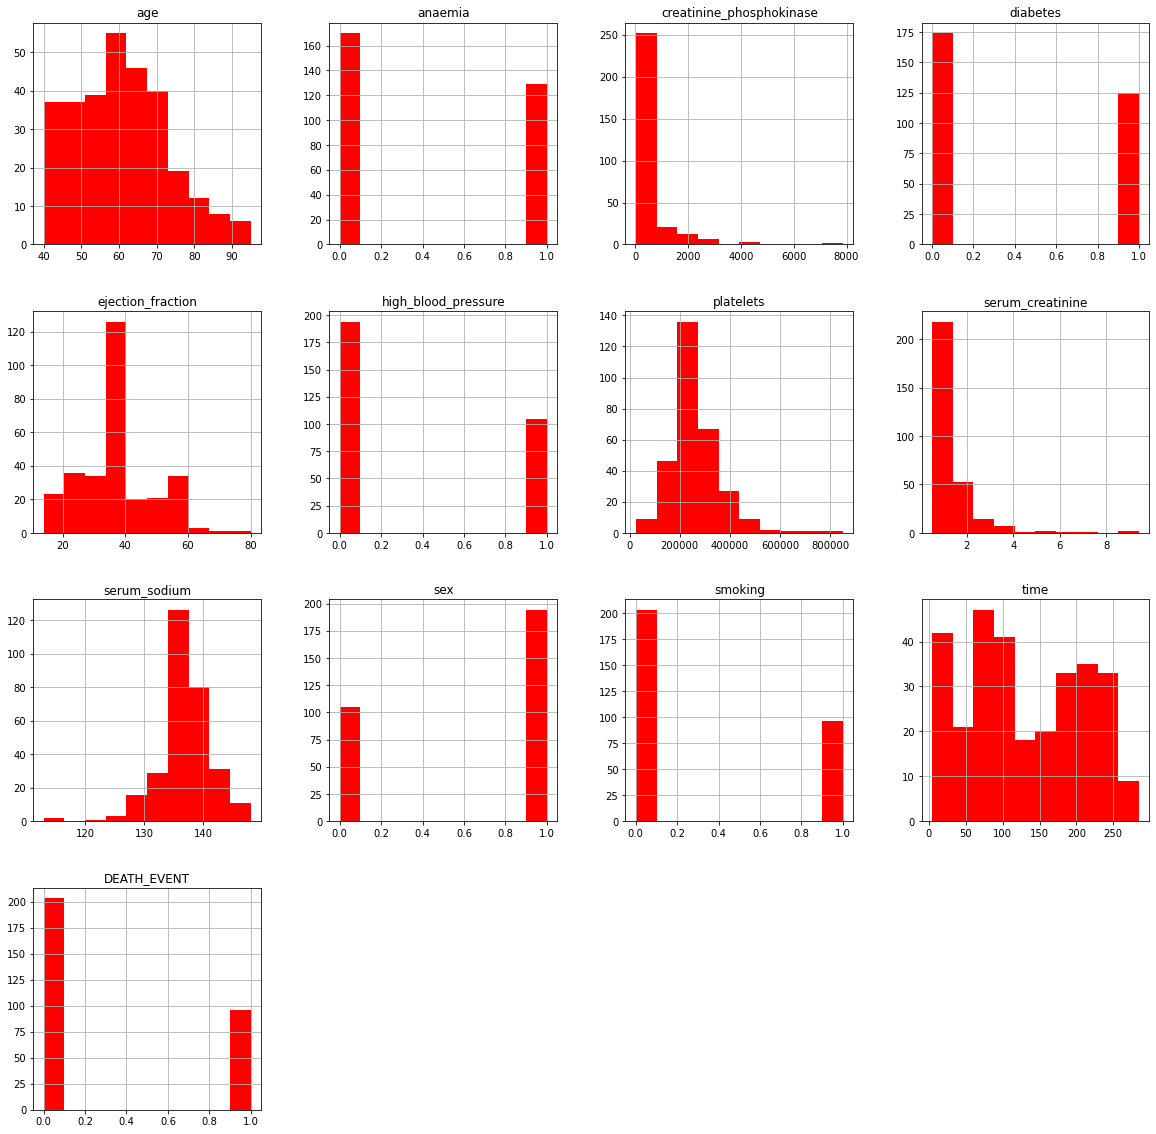

In [86]:
df.hist(figsize=(20,20),color='red')

# Seperate X,Y

In [12]:
x=df.drop('DEATH_EVENT',axis='columns')
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [13]:
y=df['DEATH_EVENT']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

# Split the dataset into train and test 

In [14]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=.30,random_state=1)

In [15]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [16]:
xtrain.shape

(209, 12)

In [17]:
xtest.shape

(90, 12)

In [18]:
clf=DecisionTreeClassifier() # Creating obj for decision tree

In [19]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

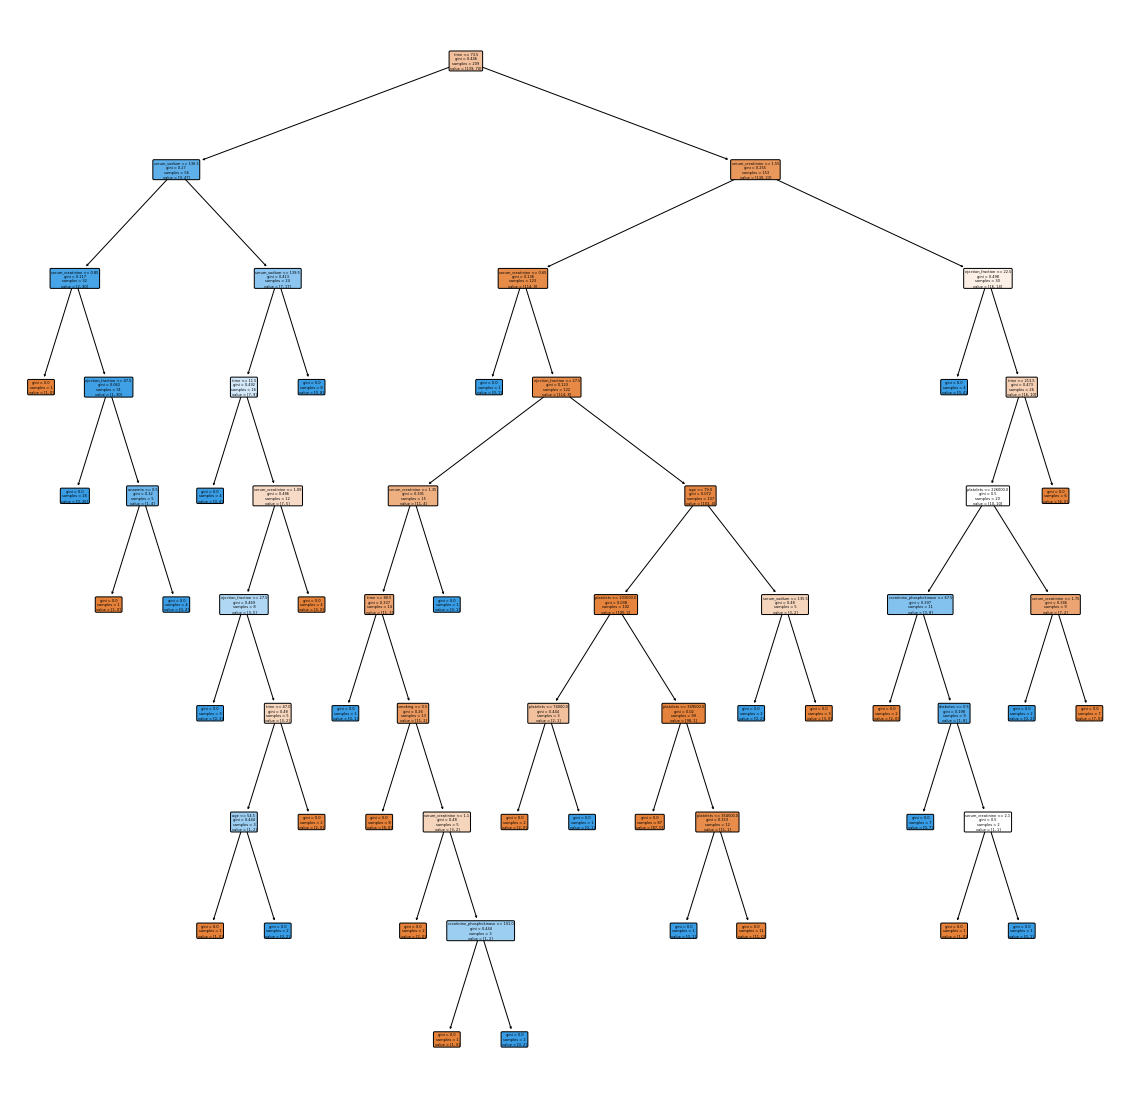

In [20]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)
plt.savefig('tree.png',dpi=1200)

In [21]:
pred=clf.predict(xtest)

In [22]:
pred # predicted result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [23]:
np.array(ytest) # actual result

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

# Confusion Matrix

In [24]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve

In [25]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87        64\n           1       0.70      0.62      0.65        26\n\n    accuracy                           0.81        90\n   macro avg       0.77      0.75      0.76        90\nweighted avg       0.81      0.81      0.81        90\n'

In [26]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.70      0.62      0.65        26

    accuracy                           0.81        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.81      0.81      0.81        90



In [27]:
cm=confusion_matrix(ytest,pred)
cm

array([[57,  7],
       [10, 16]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

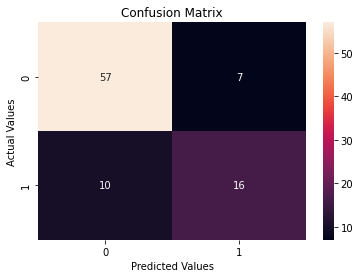

In [28]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix")

In [29]:
tp,fn,fp,tn=confusion_matrix(ytest,pred).reshape(-1)

In [30]:
tp #true positive

57

In [31]:
tn #true negative

16

In [32]:
fp # false positive

10

In [33]:
fn #false negative

7

In [34]:
tp,fn,fp,tn

(57, 7, 10, 16)

# Accuracy

In [41]:
accuracy_score(ytest,pred)

0.8111111111111111

In [43]:
acc_score=(tp+tn)/(tp+tn+fn+fp)
acc_score

0.8111111111111111

# Precision or Positive Predictive Value(PPV)

In [52]:
from sklearn.metrics import precision_score

In [53]:
precision_score(ytest,pred)

0.6956521739130435

In [49]:
prec=tp/(tp+fp)
prec

0.8507462686567164

# Negative Predictive Value(NPV)

In [83]:
npv=tn/(tn+fn)
npv

0.6956521739130435

# Recall or TPR (True Positive Rate)

In [60]:
from sklearn.metrics import recall_score

In [61]:
recall_score(ytest,pred)

0.6153846153846154

In [62]:
recll=tp/(tp+fn)
recll

0.890625

In [63]:
%recall

In [ ]:
0.890625

# False Positive Rate(FPR) or 1-Specificity

In [74]:
fpr=fp/(fp+tn)
fpr

0.38461538461538464

# Harmonic Mean, F1 Score

In [65]:
from sklearn.metrics import f1_score

In [66]:
f1_score(ytest,pred,average='micro')

0.8111111111111111

In [68]:
f1=(2*prec*recll)/(prec+recll)
f1

0.8702290076335878

# F1 Measure

In [69]:
f1_mes=(prec+recll)/2
f1_mes

0.8706856343283582

# True Negitive Rate (TNR) or Specificity,Selectivity

In [75]:
specificity= tn/(tn+fp)
specificity

0.6153846153846154

# Threat Score(TS) or Critical Sucess Index(CSI)

In [77]:
csi=tp/(tn+fn+fp)
csi

1.7272727272727273

# False Discovery Rate(FDR)

In [78]:
fdr=fp/(tp+fp)
fdr

0.14925373134328357

# Balanced Accuracy(BA)

In [80]:
ba=(recll+specificity)/2
ba

0.7530048076923077

# Bookmark Informedness(BM) or informedness

In [81]:
bm=recll+specificity-1
bm

0.5060096153846154

# Markedness(MK) or deltap

In [84]:
mk=prec+npv-1
mk

0.5463984425697599

# AUC

In [35]:
from sklearn.metrics import plot_roc_curve

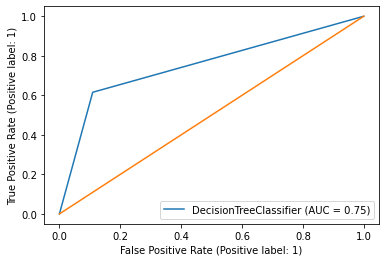

In [36]:
plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])